# NLP Group Project 
## Heather's Notebook

In [64]:
import pandas as pd
import numpy as np
import unicodedata
import re
import nltk

# imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm # for colormap tools
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# import modules 
import prepare as p
import acquire as a
import explore as ex
import model as m

# imports for NLP extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix


plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_json('data2.json')

In [3]:
df.head()

,repo,language,readme_contents
0,codingXiaxw/CustomerManagement,Java,## JavaWeb项目之客户管理系统 \n\n## 项目介绍\n详细讲解请点击这里前往我的...
1,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...
2,Tophold/FinancialCustomerView,Java,## FinancialCustomerView\n* 本项目会对金融交易软件中存在的各种V...
3,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...
4,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             194 non-null    object
 1   language         187 non-null    object
 2   readme_contents  194 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [5]:
df.language.value_counts()

PHP                 41
Jupyter Notebook    32
JavaScript          25
Java                23
Python              20
C#                  12
TypeScript           4
R                    4
HTML                 4
Ruby                 3
Vue                  3
Go                   3
Dart                 2
HCL                  2
PowerShell           2
CSS                  2
ABAP                 1
Swift                1
Shell                1
Objective-C          1
Scala                1
Name: language, dtype: int64

In [6]:
df = p.drop_unneeded_data(df)

<AxesSubplot:>

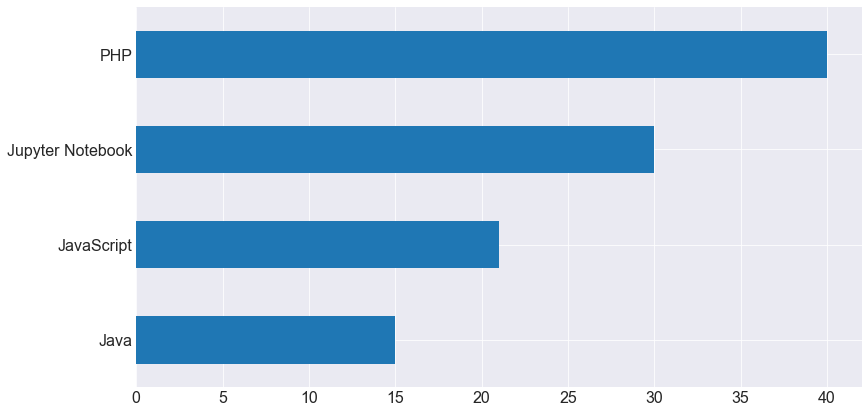

In [7]:
df.language.value_counts().sort_values(ascending = True).plot.barh()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             106 non-null    object
 1   language         106 non-null    object
 2   readme_contents  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


### Explore Data
- Will explore lemmatized data
- try to find common words 
- 4 different categories, JavaScript, Java, Jupyter Notebook, PHP
    - PHP is a general-purpose scripting language geared towards web development
    - Java - programming language, object oriented, standalone language
    - JavaScript - Scripting language needs to be integrated into an HTML program for execution.
    - Jupyter notebook has raw code that is a JSON but is an interface for other programming languages

In [59]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)


df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'])

train, validate, test = p.split_data(df)

train---> (58, 6)
validate---> (26, 6)
test---> (22, 6)


In [60]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
23,Asutosh11/CustomerSupportChat,Java,[![](https://jitpack.io/v/Asutosh11/CustomerSu...,httpsjitpackiovasutosh11customersupportchatsvg...,httpsjitpackiovasutosh11customersupportchatsvg...,httpsjitpackiovasutosh11customersupportchatsvg...
6,eventuate-tram/eventuate-tram-sagas-examples-c...,Java,\n= Eventuate Tram Sagas Customers and Orders\...,eventuate tram sagas orders application demons...,eventu tram saga order applic demonstr maintai...,eventuate tram saga order application demonstr...
26,erictam96/E-commerceCustomerFYP,Java,# E-commerce Customer Android App FYP\nThis An...,ecommerce android app fyp android app universi...,ecommerc android app fyp android app univers f...,ecommerce android app fyp android app universi...
45,firegento/firegento-customer,PHP,<!-- ALL-CONTRIBUTORS-BADGE:START - Do not rem...,allcontributorsbadgestart remove modify sectio...,allcontributorsbadgestart remov modifi section...,allcontributorsbadgestart remove modify sectio...
70,awslabs/aws-customer-churn-pipeline,Jupyter Notebook,# Customer Churn Pipeline on AWS\n\n*A product...,churn pipeline aws productionfocused end end c...,churn pipelin aw productionfocus end end churn...,churn pipeline aws productionfocused end end c...


In [61]:
all_word_counts = ex.get_word_counts_series(train, 'lemmatized')
java_word_counts = ex.get_word_counts_series(train[train.language == 'Java'], 'lemmatized')
javascript_word_counts = ex.get_word_counts_series(train[train.language == 'JavaScript'], 'lemmatized')
php_word_counts = ex.get_word_counts_series(train[train.language == 'PHP'], 'lemmatized')
jupyter_word_counts = ex.get_word_counts_series(train[train.language == 'Jupyter Notebook'], 'lemmatized')

In [12]:
all_word_counts[all_word_counts.index == 'customer']

Series([], dtype: int64)

- Since we searched for `customer` those will be in every single one 
- That word is removed in the prep function above

In [13]:
word_counts_list = [java_word_counts, javascript_word_counts, php_word_counts, jupyter_word_counts, all_word_counts]
column_names = list(df.language.unique())
column_names.append('all')

languages = list(df.language.unique())

In [14]:
word_counts = pd.concat(word_counts_list, axis=1).fillna(0).astype(int)
word_counts.columns = column_names
word_counts.head()

,JavaScript,Java,Jupyter Notebook,PHP,all
service,126,9,4,20,159
order,116,4,29,5,154
saga,58,0,0,0,58
using,47,23,25,55,150
event,36,8,10,41,95


In [98]:
blues = [ '#f1faee', '#a8dadc', '#457b9d', '#1d3557', '#e63946']
viridis_palette = sns.color_palette("viridis")
viridis_palette

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [107]:
def plot_overlap_stacked_bar(word_counts, category, num_top = 20, cmap = None):
    '''
    This function takes in word_counts df
        - Must have counts for each category as well as a category named 'all'
    category you want to sort by (aka top 20 words in java readmes)
    num_top is how many words you want to see the proportion of, default = 20
    Default colors are tab10 but you can customize that
    
    for cmap use 'viridis'
    
    '''
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=16)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all', ascending=False)
     .head(num_top)
     .apply(lambda row: row / row['all'], axis=1)
     .drop(columns='all')
     .sort_values(by=category)
     .plot.barh(stacked=True, width=1, ec='lightgrey', cmap = cmap, alpha = 1))
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.title(f'% of most common {num_top} {category} Readme Words\n')
    plt.xlabel('\nProportion of Overlap')
    # make tick lables display as percentages!! 
    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    
    plt.show()

<Figure size 1152x648 with 0 Axes>

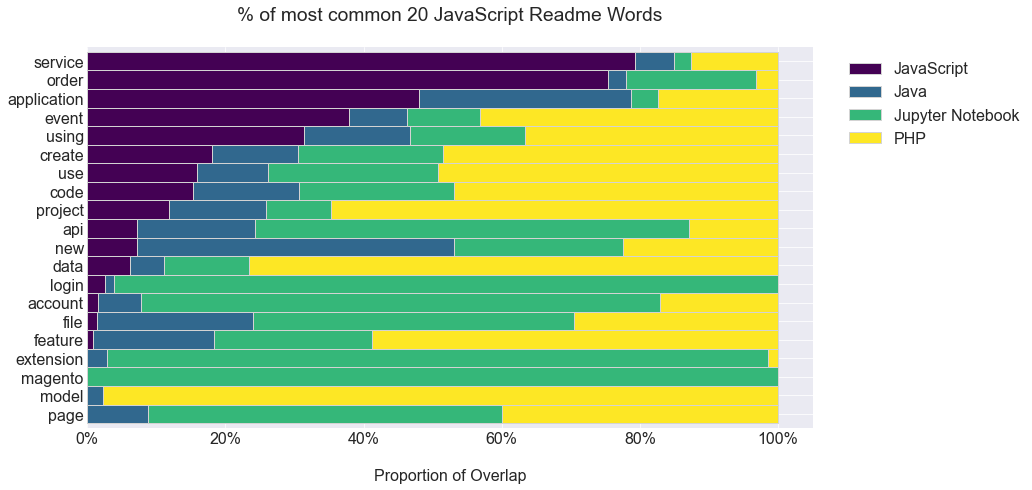

<Figure size 1152x648 with 0 Axes>

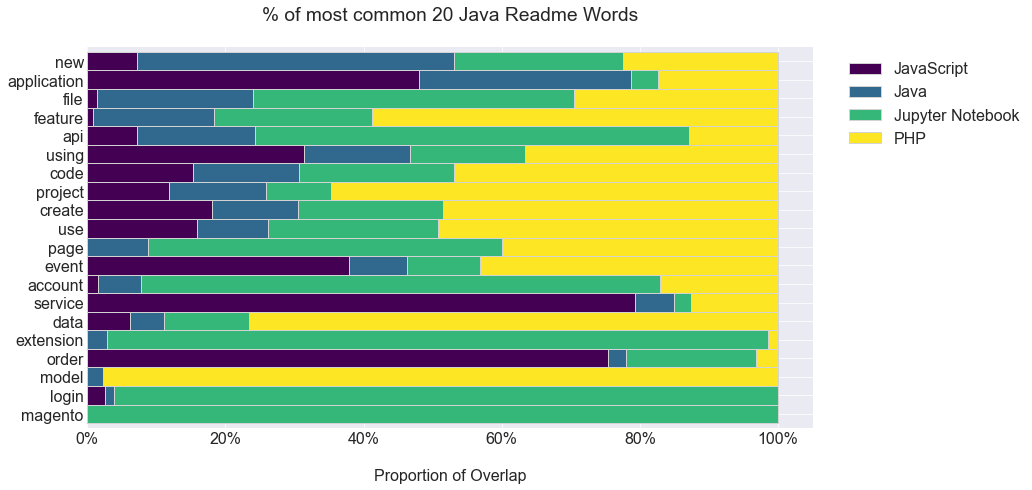

<Figure size 1152x648 with 0 Axes>

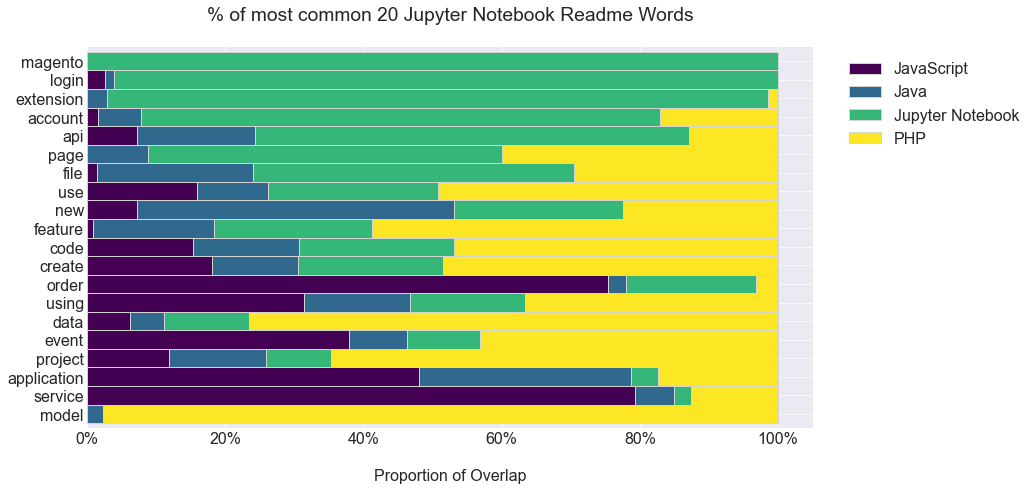

<Figure size 1152x648 with 0 Axes>

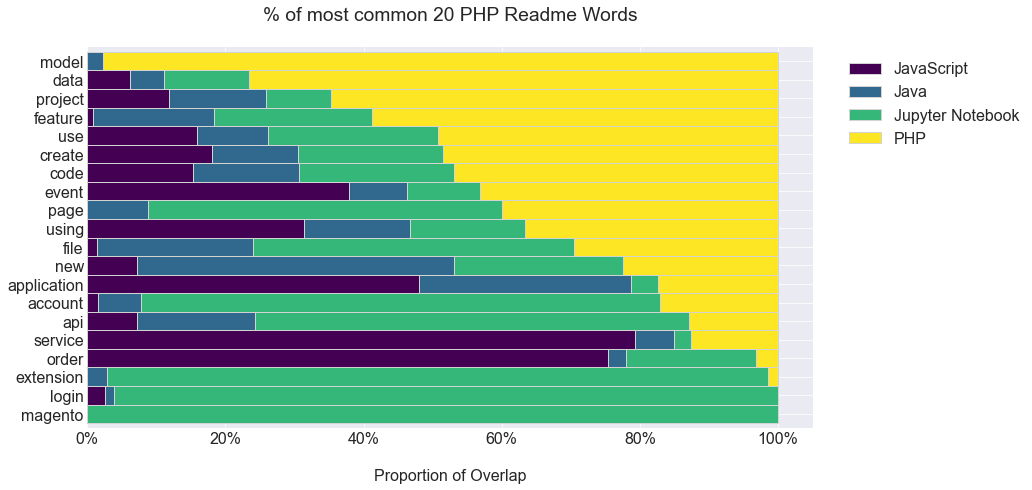

In [108]:
for language in languages:
    plot_overlap_stacked_bar(word_counts, language, cmap = 'viridis')

### Takeaways
- 'magento' is only in jupyter notebooks
- 'extension' mostly in jupyter notebooks but only found elsewhere in Java readmes
- 'model' is very common for php, close to 95% 
- 'notebook' is only in PHP. Weird that it's not in jupyter readmes at all 

#### Words to remove
- 1
- 2

### Next Steps
- Create Bigrams
- Create Trigrams

In [17]:
# create words lists
words = ' '.join(train['lemmatized'])
all_words = words.split()

words = ' '.join(train[train.language == 'JavaScript']['lemmatized'])
javascript_words = words.split()

words = ' '.join(train[train.language == 'Java']['lemmatized'])
java_words = words.split()

words = ' '.join(train[train.language == 'PHP']['lemmatized'])
php_words = words.split()

words = ' '.join(train[train.language == 'Jupyter Notebook']['lemmatized'])
jupyter_words = words.split()


all_the_words_list = [javascript_words, java_words, jupyter_words, php_words, all_words]

In [18]:
column_names

['JavaScript', 'Java', 'Jupyter Notebook', 'PHP', 'all']

-------------------------------------------------JavaScript---------------------------------------------------------


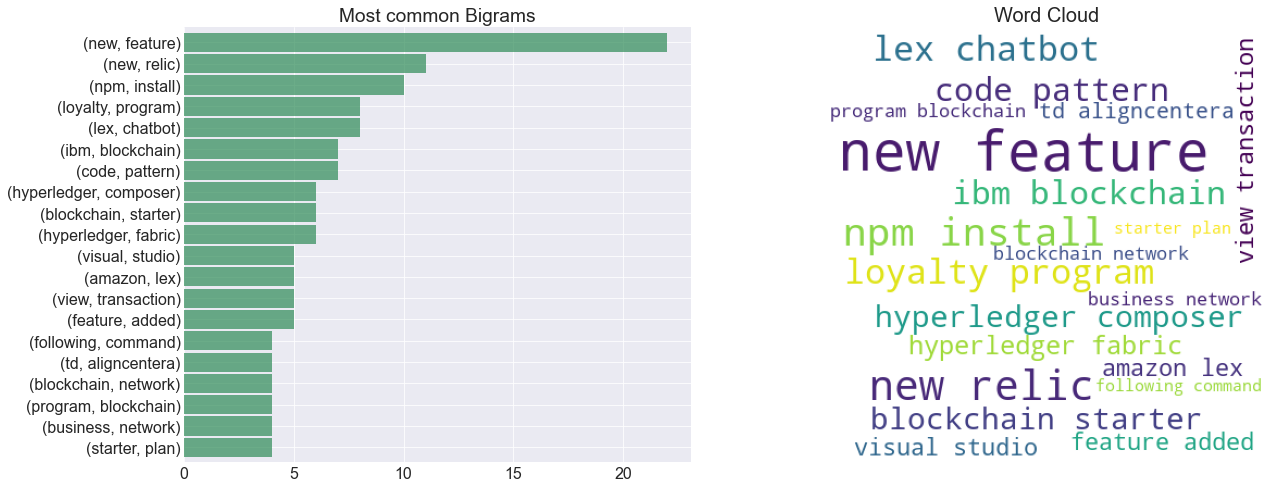

-------------------------------------------------Java---------------------------------------------------------


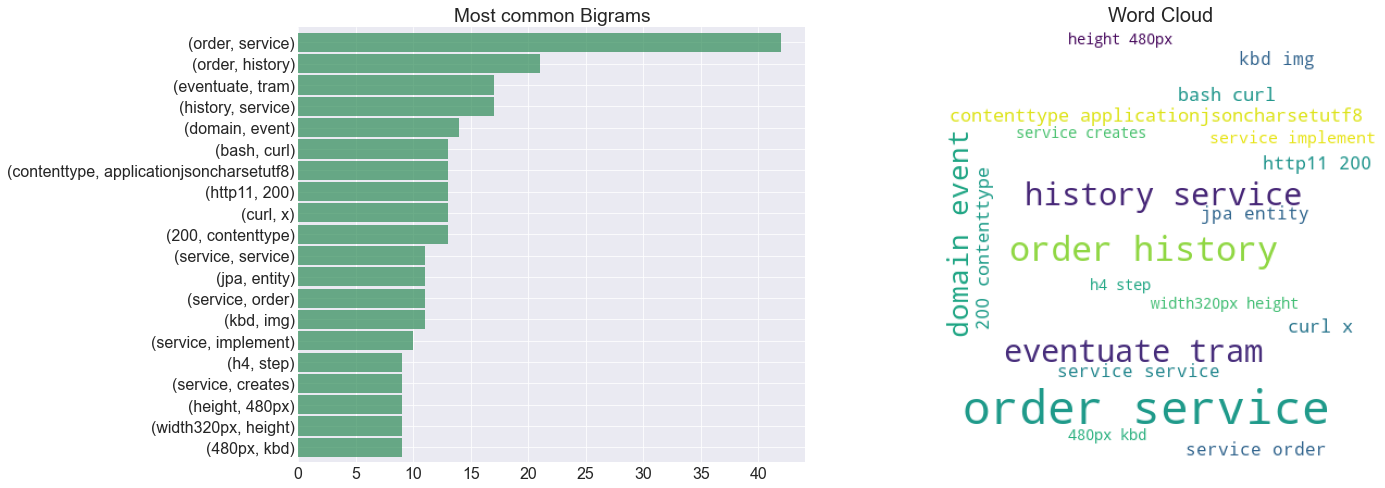

-------------------------------------------------Jupyter Notebook---------------------------------------------------------


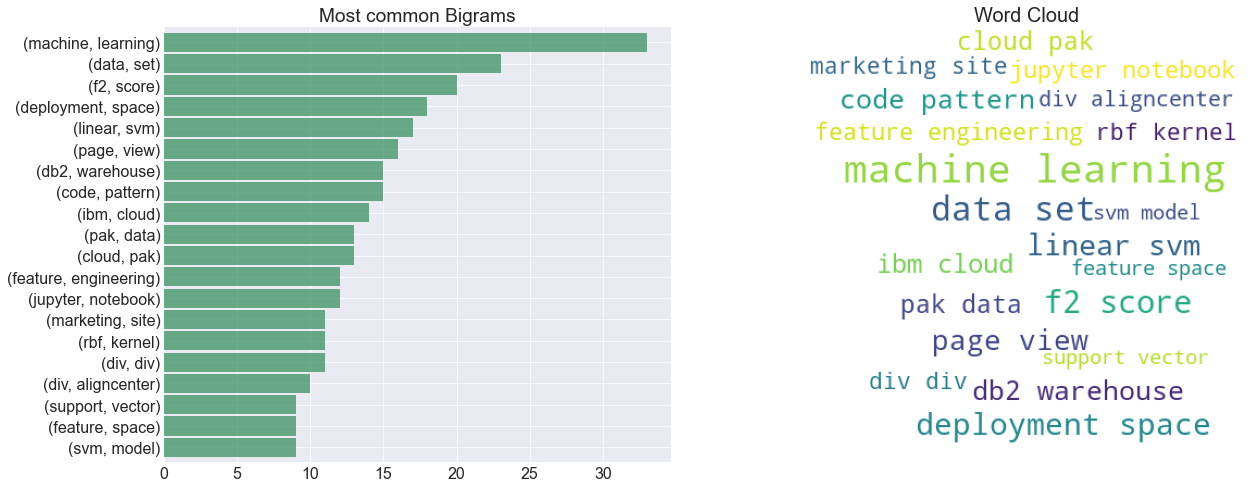

-------------------------------------------------PHP---------------------------------------------------------


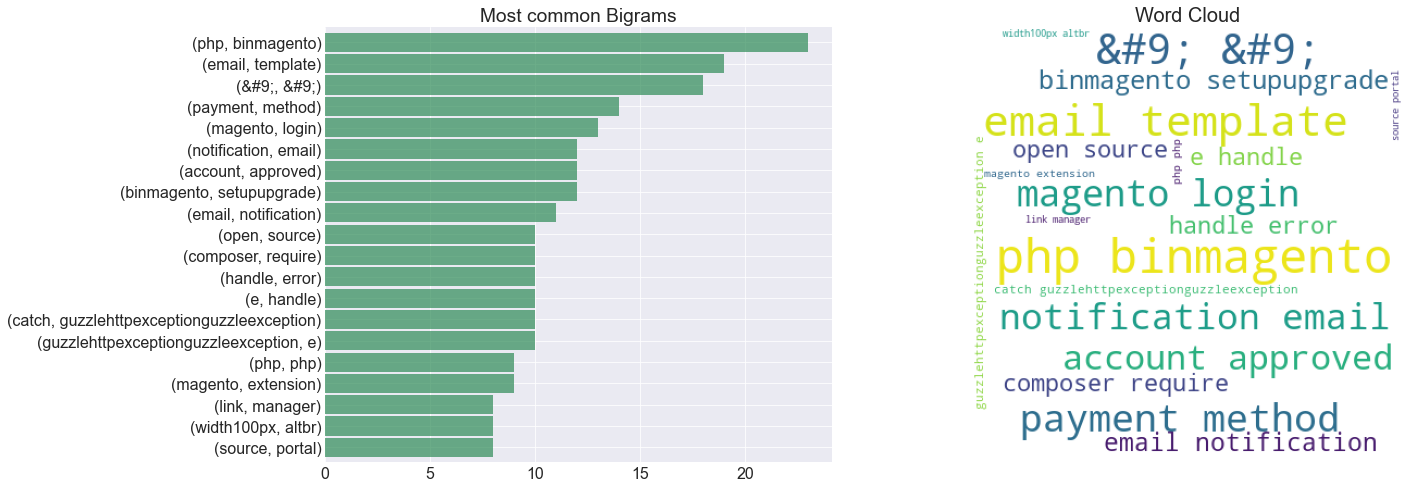

-------------------------------------------------all---------------------------------------------------------


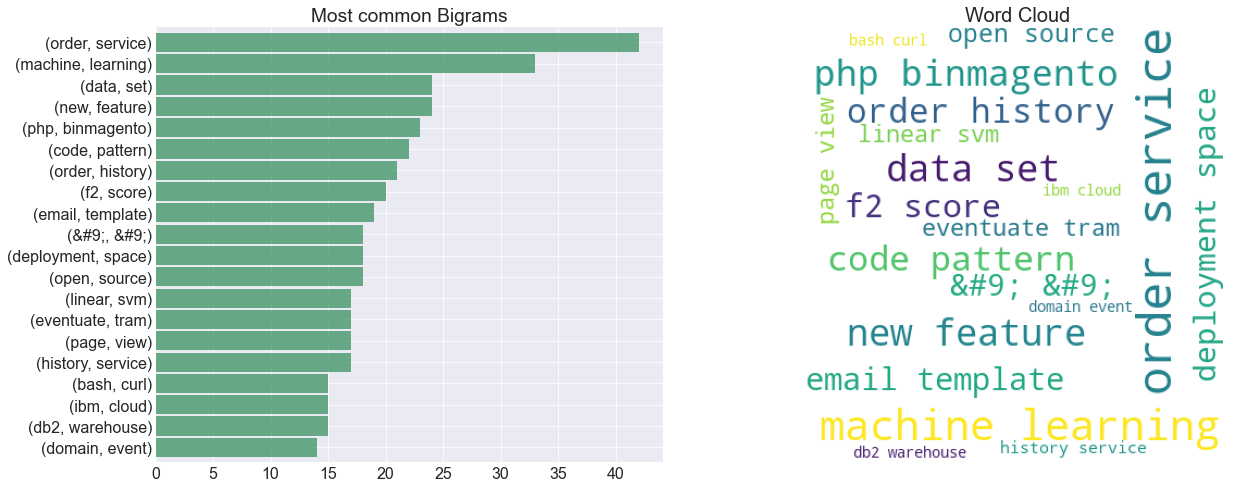

In [19]:
for x, name in zip(all_the_words_list, column_names):
    print(f'-------------------------------------------------{name}---------------------------------------------------------')
    ex.bigram_count_word_cloud(x)

- Guzzle is a PHP HTTP client that makes it easy to send HTTP requests and trivial to integrate with web services.

-------------------------------------------------JavaScript---------------------------------------------------------


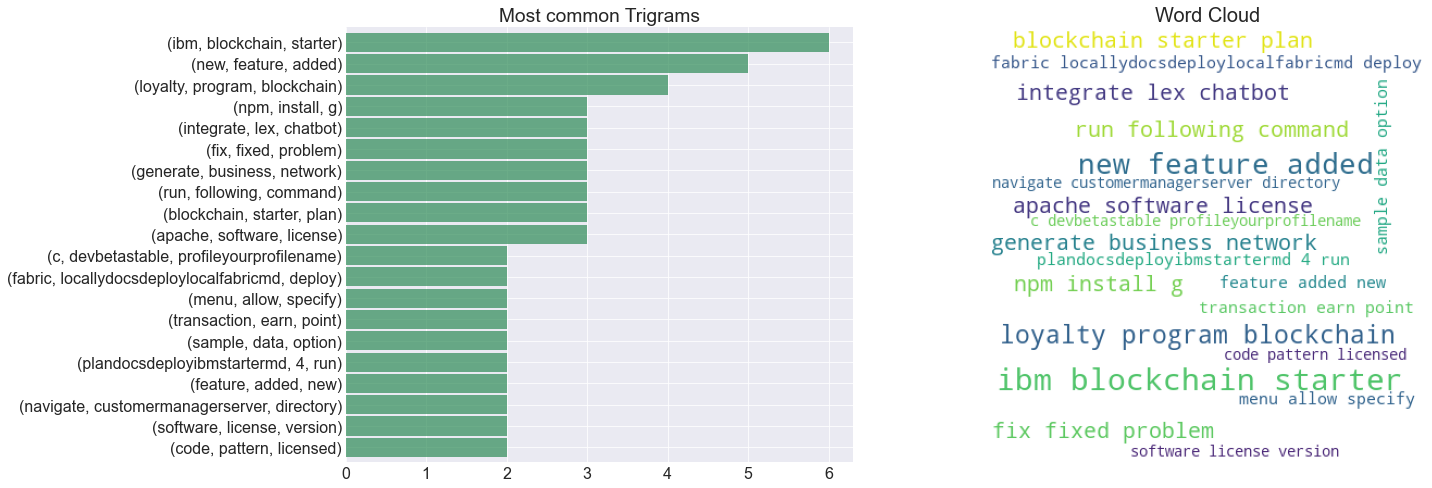

-------------------------------------------------Java---------------------------------------------------------


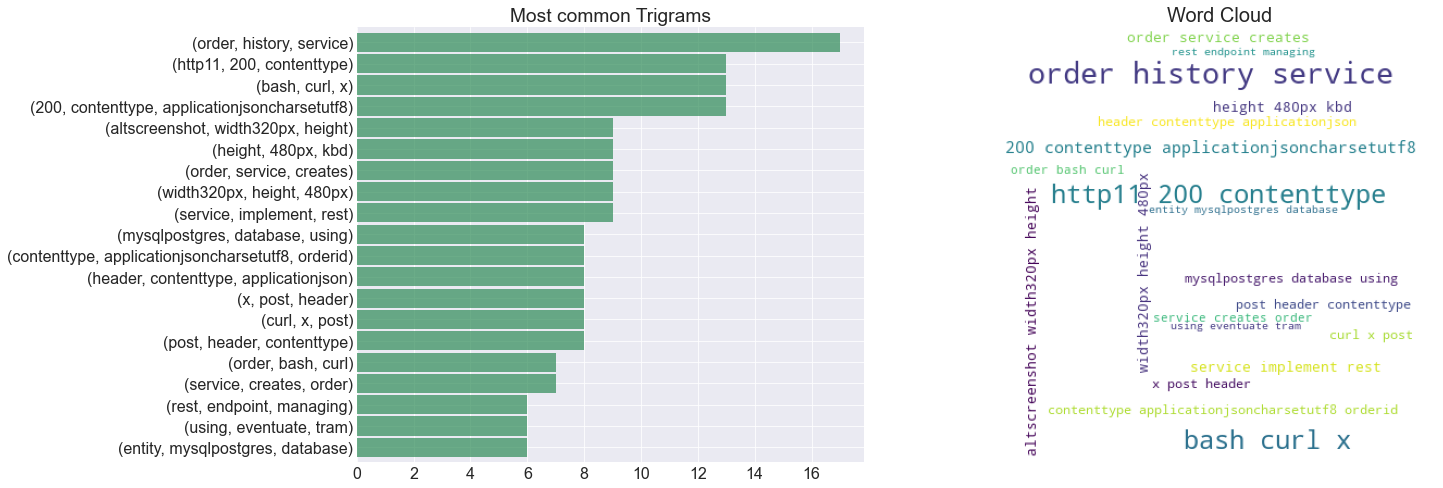

-------------------------------------------------Jupyter Notebook---------------------------------------------------------


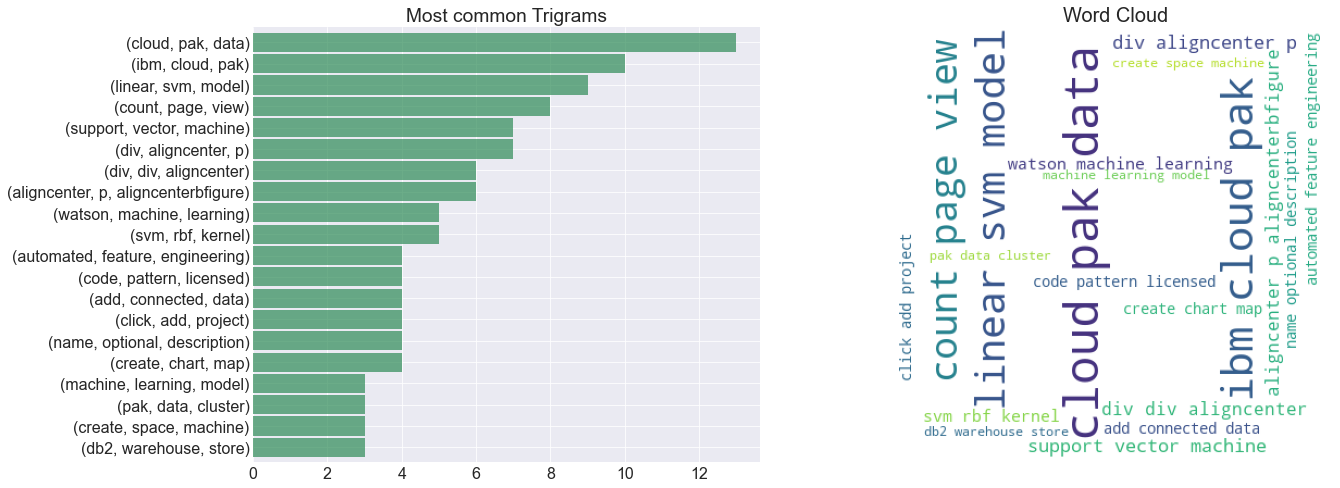

-------------------------------------------------PHP---------------------------------------------------------


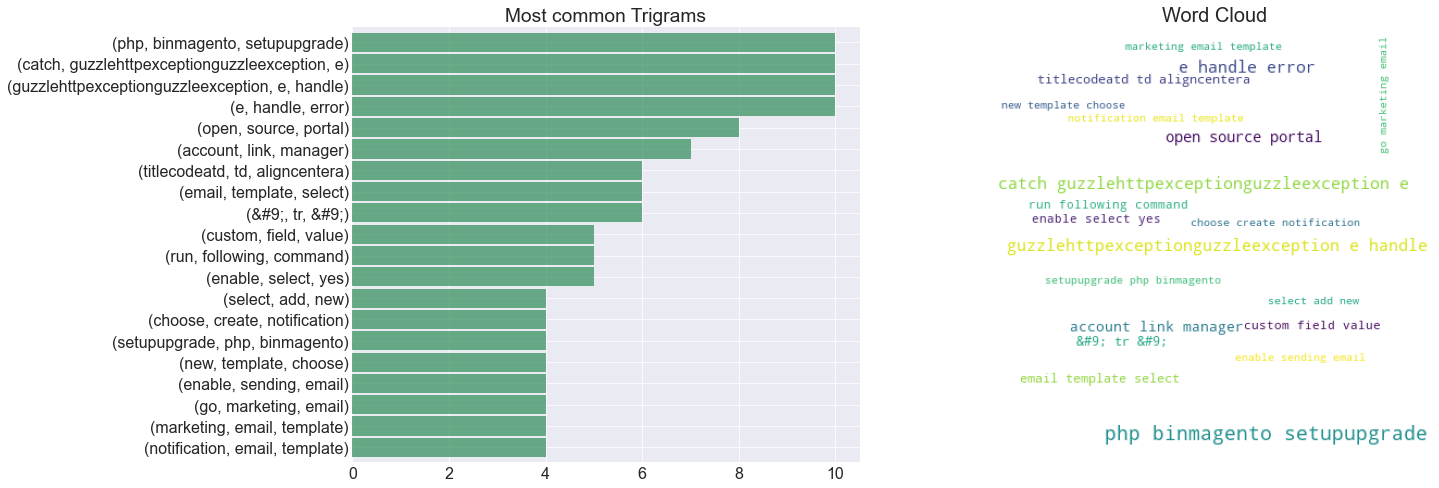

-------------------------------------------------all---------------------------------------------------------


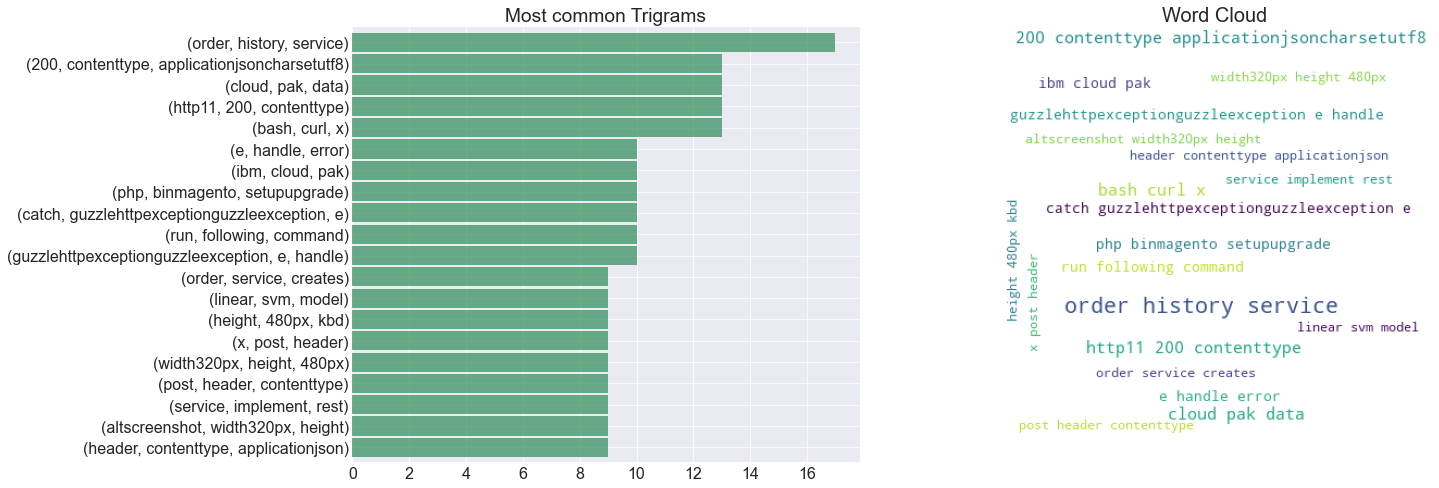

In [20]:
for x, name in zip(all_the_words_list, column_names):
    print(f'-------------------------------------------------{name}---------------------------------------------------------')
    ex.trigram_count_word_cloud(x)

### Takeaways Bigrams and Trigrams
- there are pretty distinct trigrams and bigrams between the different languages
- Could try modeling with both
- Some ngrams like 'watson assistant service' and 'marketing site' might be there because of the domain, we'll have to pay attention to those words during modeling


In [62]:
word_cloud_words = ' '.join(train['lemmatized'])

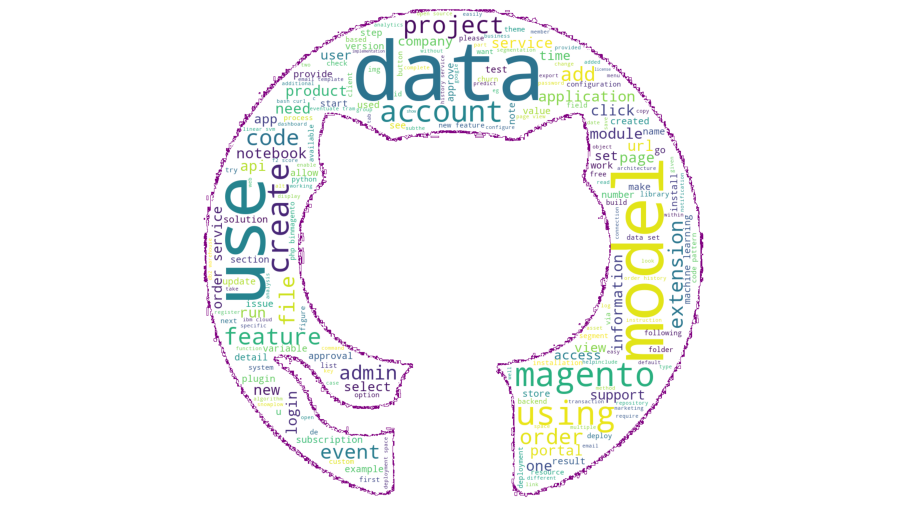

In [63]:
mask = np.array(Image.open('images/github_logo.jpeg'))
img = WordCloud(background_color='white', width=800, height=400, 
                 contour_width = 1, contour_color = 'purple', mask = mask)

plt.figure(figsize = (16,16))
img.generate(word_cloud_words)
plt.imshow(img)
plt.axis('off')
plt.show()

### Modeling 

In [21]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)


df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'])

In [22]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

# use function from above (need to put in a module)
# split to X/y datasets 

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [23]:
# create dataframe to stor the scores
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

In [24]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

model_names = ['Naive_Bayes_tfidf', 'SVC_tfidf', 'Decision_tree_tfidf', 'Random_forest_tfidf', 'KNN_tfidf']

class_names = ['Java', 'JavaScript', 'Jupyter Notebook','PHP' ]

                   ============== Naive_Bayes_tfidf ================           
MultinomialNB()
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      0.62      0.77         8
      JavaScript       1.00      0.64      0.78        11
Jupyter Notebook       1.00      1.00      1.00        17
             PHP       0.76      1.00      0.86        22

        accuracy                           0.88        58
       macro avg       0.94      0.82      0.85        58
    weighted avg       0.91      0.88      0.87        58



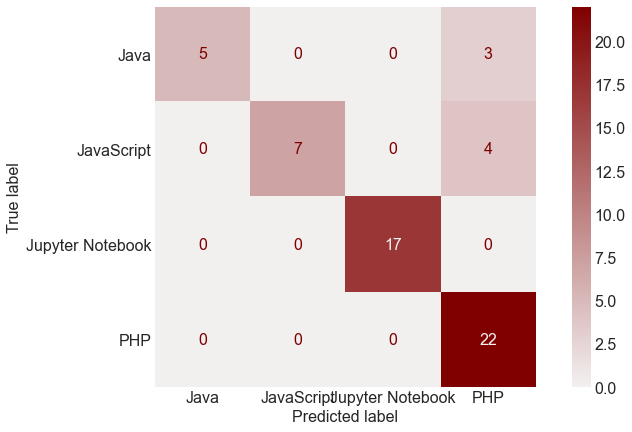


MultinomialNB()
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      0.25      0.40         4
      JavaScript       0.00      0.00      0.00         5
Jupyter Notebook       1.00      0.71      0.83         7
             PHP       0.50      1.00      0.67        10

        accuracy                           0.62        26
       macro avg       0.62      0.49      0.47        26
    weighted avg       0.62      0.62      0.54        26



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


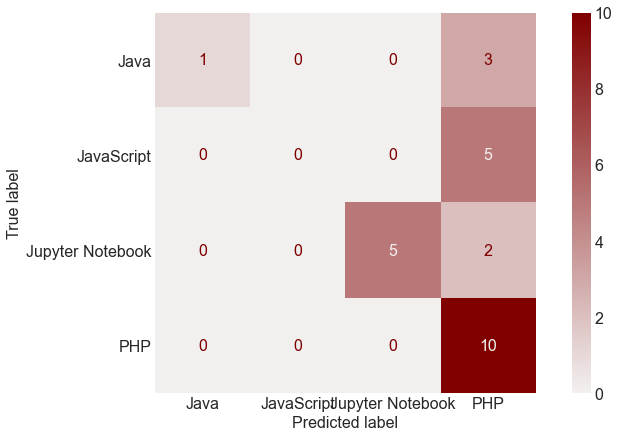


-------------------------------------------------------------------

                   ============== SVC_tfidf ================           
LinearSVC()
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      1.00      1.00         8
      JavaScript       1.00      1.00      1.00        11
Jupyter Notebook       1.00      1.00      1.00        17
             PHP       1.00      1.00      1.00        22

        accuracy                           1.00        58
       macro avg       1.00      1.00      1.00        58
    weighted avg       1.00      1.00      1.00        58



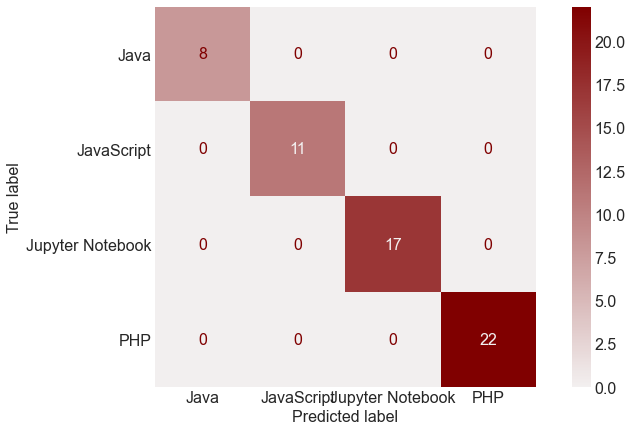


LinearSVC()
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      0.25      0.40         4
      JavaScript       1.00      0.80      0.89         5
Jupyter Notebook       0.78      1.00      0.88         7
             PHP       0.83      1.00      0.91        10

        accuracy                           0.85        26
       macro avg       0.90      0.76      0.77        26
    weighted avg       0.88      0.85      0.82        26



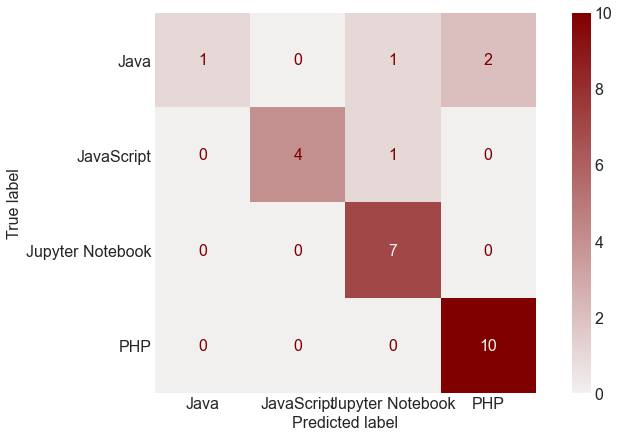


-------------------------------------------------------------------

                   ============== Decision_tree_tfidf ================           
DecisionTreeClassifier()
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      1.00      1.00         8
      JavaScript       1.00      1.00      1.00        11
Jupyter Notebook       1.00      1.00      1.00        17
             PHP       1.00      1.00      1.00        22

        accuracy                           1.00        58
       macro avg       1.00      1.00      1.00        58
    weighted avg       1.00      1.00      1.00        58



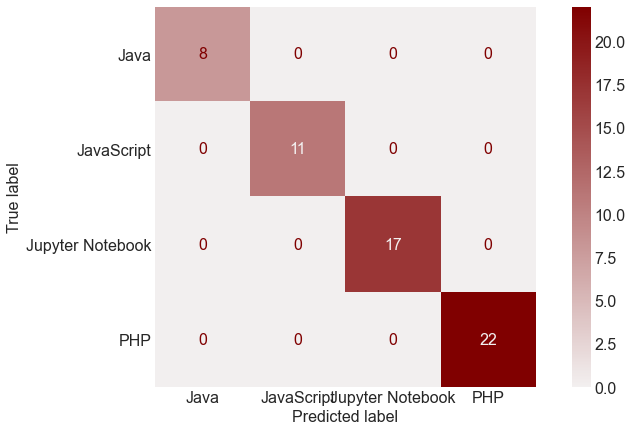


DecisionTreeClassifier()
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       0.40      0.50      0.44         4
      JavaScript       1.00      1.00      1.00         5
Jupyter Notebook       0.50      0.57      0.53         7
             PHP       0.88      0.70      0.78        10

        accuracy                           0.69        26
       macro avg       0.69      0.69      0.69        26
    weighted avg       0.73      0.69      0.70        26



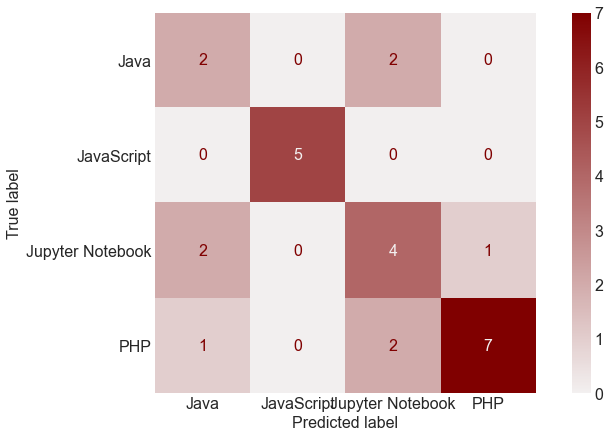


-------------------------------------------------------------------

                   ============== Random_forest_tfidf ================           
RandomForestClassifier()
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      1.00      1.00         8
      JavaScript       1.00      1.00      1.00        11
Jupyter Notebook       1.00      1.00      1.00        17
             PHP       1.00      1.00      1.00        22

        accuracy                           1.00        58
       macro avg       1.00      1.00      1.00        58
    weighted avg       1.00      1.00      1.00        58



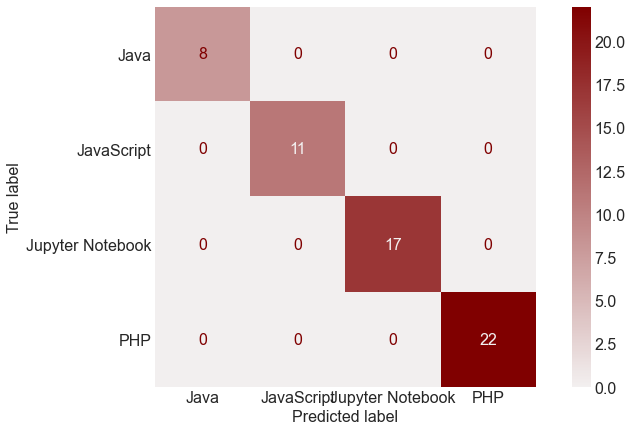


RandomForestClassifier()
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       1.00      0.25      0.40         4
      JavaScript       1.00      0.60      0.75         5
Jupyter Notebook       0.70      1.00      0.82         7
             PHP       0.75      0.90      0.82        10

        accuracy                           0.77        26
       macro avg       0.86      0.69      0.70        26
    weighted avg       0.82      0.77      0.74        26



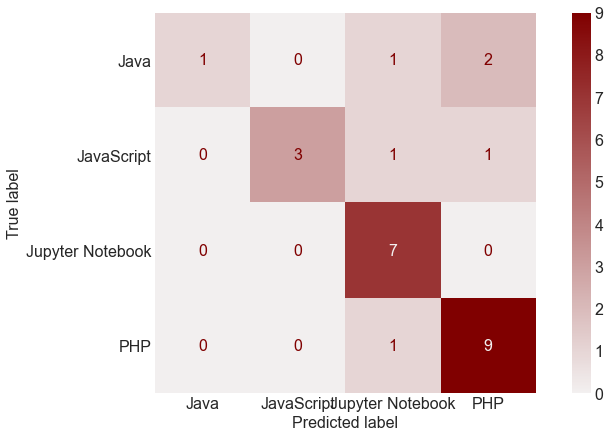


-------------------------------------------------------------------

                   ============== KNN_tfidf ================           
KNeighborsClassifier()
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       0.73      1.00      0.84         8
      JavaScript       0.89      0.73      0.80        11
Jupyter Notebook       0.94      1.00      0.97        17
             PHP       0.95      0.86      0.90        22

        accuracy                           0.90        58
       macro avg       0.88      0.90      0.88        58
    weighted avg       0.91      0.90      0.90        58



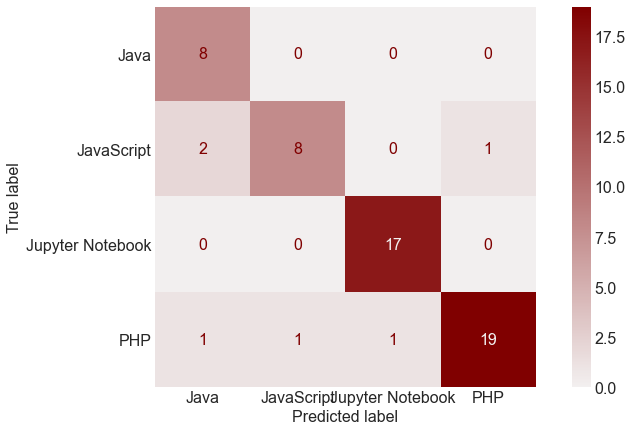


KNeighborsClassifier()
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

            Java       0.50      0.50      0.50         4
      JavaScript       0.67      0.80      0.73         5
Jupyter Notebook       0.88      1.00      0.93         7
             PHP       1.00      0.80      0.89        10

        accuracy                           0.81        26
       macro avg       0.76      0.77      0.76        26
    weighted avg       0.83      0.81      0.81        26



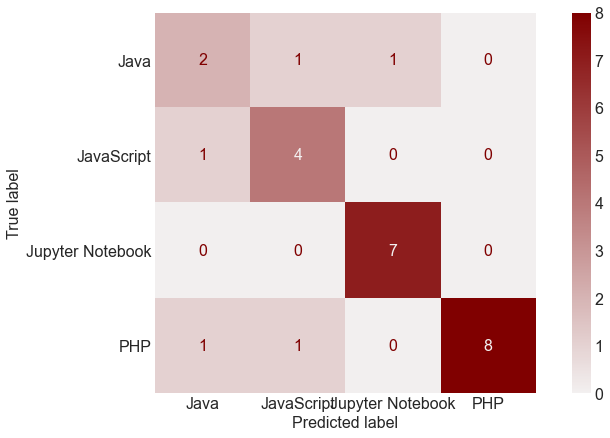


-------------------------------------------------------------------



In [25]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)
    
    m.make_models_and_print_metrics(model, name, X_train, y_train, X_validate, y_validate, class_names)

In [26]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)

df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'])

In [27]:
cv = CountVectorizer(ngram_range=(2, 2))

X_data = cv.fit_transform(df.lemmatized)
y_data = df.language

# use function from above (need to put in a module)
# split to X/y datasets 

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [28]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

model_names = ['Naive_Bayes_bigrams', 'SVC_bigrams', 'Decision_tree_bigrams', 'Random_forest_bigrams', 'KNN_bigrams']

class_names = ['Java', 'JavaScript', 'Jupyter Notebook','PHP' ]

In [29]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)
    
    #m.make_models_and_print_metrics(model, name, X_train, y_train, X_validate, y_validate, class_names)

In [30]:
score_df.sort_values(by = 'validate_score', ascending = False)

,model_name,train_score,validate_score
1,SVC_tfidf,1.000000,0.846154
4,KNN_tfidf,0.896552,0.807692
3,Random_forest_tfidf,1.000000,0.730769
2,Decision_tree_tfidf,1.000000,0.653846
0,Naive_Bayes_tfidf,0.879310,0.615385
5,Naive_Bayes_bigrams,0.982759,0.576923
7,Decision_tree_bigrams,1.000000,0.576923
6,SVC_bigrams,1.000000,0.461538
8,Random_forest_bigrams,1.000000,0.384615
9,KNN_bigrams,0.706897,0.346154


In [31]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)

df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'])

In [32]:
tfidf = TfidfVectorizer()

X_data = tfidf.fit_transform(df.stemmed)
y_data = df.language

# use function from above (need to put in a module)
# split to X/y datasets 

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [33]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

model_names = ['Naive_Bayes_stemmed', 'SVC_stemmed', 'Decision_tree_stemmed', 'Random_forest_stemmed', 'KNN_bigrams_stemmed']

class_names = ['Java', 'JavaScript', 'Jupyter Notebook','PHP' ]

In [34]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)
    
    #m.make_models_and_print_metrics(model, name, X_train, y_train, X_validate, y_validate, class_names)

In [35]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [36]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

model_names = ['Naive_Bayes_tfidf2', 'SVC_tfidf2', 'Decision_tree_tfidf2', 'Random_forest_tfidf2', 'KNN_bigrams_tfidf2']

class_names = ['Java', 'JavaScript', 'Jupyter Notebook','PHP' ]

In [37]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [38]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [39]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=10, weights= 'distance')]

model_names = ['Naive_Bayes_tfidf_clean', 'SVC_tfidf_clean', 'Decision_tree_tfidf_clean', 'Random_forest_tfidf_clean', 'KNN_n10_tfidf_clean']

class_names = ['Java', 'JavaScript', 'Jupyter Notebook','PHP' ]

In [40]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [41]:
score_df.sort_values(by = 'validate_score', ascending = False)

,model_name,train_score,validate_score
21,SVC_tfidf_clean,1.000000,0.846154
1,SVC_tfidf,1.000000,0.846154
24,KNN_n10_tfidf_clean,1.000000,0.807692
11,SVC_stemmed,1.000000,0.807692
4,KNN_tfidf,0.896552,0.807692
19,KNN_bigrams_tfidf2,0.862069,0.807692
23,Random_forest_tfidf_clean,1.000000,0.769231
22,Decision_tree_tfidf_clean,1.000000,0.769231
14,KNN_bigrams_stemmed,0.879310,0.769231
13,Random_forest_stemmed,1.000000,0.769231


### Modeling Takeaways 
- SVC using tfidf performed the best. with an 84

- Using the clean column, TFIDF, KNN with k=10 performed with 85

In [45]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)

df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=[])

tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

# use function from above (need to put in a module)
# split to X/y datasets 

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

#Create the KNN object with a k = 10
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

#Fit the object to the vectorized training data
knn.fit(X_train, y_train)

#Create corresponding dataframes for the actual values of the categories that correspond to each article
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the knn model
train['predicted'] = knn.predict(X_train)
validate["predicted"] = knn.predict(X_validate)

#Review how the knn model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted,  zero_division=0))
print('----------------')
#Review how the knn model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
                  precision    recall  f1-score   support

            Java       1.00      1.00      1.00         8
      JavaScript       1.00      1.00      1.00        11
Jupyter Notebook       1.00      1.00      1.00        17
             PHP       1.00      1.00      1.00        22

        accuracy                           1.00        58
       macro avg       1.00      1.00      1.00        58
    weighted avg       1.00      1.00      1.00        58

----------------
Out-of-sample data model performance:
                  precision    recall  f1-score   support

            Java       0.67      0.50      0.57         4
      JavaScript       1.00      0.40      0.57         5
Jupyter Notebook       0.78      1.00      0.88         7
             PHP       0.83      1.00      0.91        10

        accuracy                           0.81        26
       macro avg       0.82      0.72      0.73        26
    weighted avg       0.82      0.8

In [46]:
y_train.head()

23                Java
6                 Java
26                Java
45                 PHP
70    Jupyter Notebook
Name: language, dtype: object

In [47]:
df.language.value_counts()

PHP                 40
Jupyter Notebook    30
JavaScript          21
Java                15
Name: language, dtype: int64

(58,)